<a href="https://colab.research.google.com/github/ashigupta99/Finlatics_Python_ML/blob/main/Facebook_Case_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ques1**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [ ]:
dataset=pd.read_csv('Facebook.csv')

3 Ways to correlate time frame to prices, extract date hour year or turn to unix timestamp

In [ ]:
dataset.iloc[:,2]=pd.to_datetime(dataset.iloc[:,2])
dataset['time']=dataset.iloc[:,2].values
dataset['num']=dataset.iloc[:,3].values
dataset['hour']=dataset['time'].dt.hour
dataset['day']=dataset['time'].dt.day
dataset['month']=dataset['time'].dt.month
dataset['year']=dataset['time'].dt.year
corr1= dataset[['hour','num']].corr()
print(corr1)
corr2= dataset[['day','num']].corr()
print(corr2)
corr3= dataset[['month','num']].corr()
print(corr3)
corr4= dataset[['year','num']].corr()
print(corr4)

          hour       num
hour  1.000000  0.017016
num   0.017016  1.000000
          day       num
day  1.000000 -0.006292
num -0.006292  1.000000
          month       num
month  1.000000 -0.114712
num   -0.114712  1.000000
          year       num
year  1.000000 -0.042703
num  -0.042703  1.000000


In [ ]:
dataset.iloc[:,2]=pd.to_datetime(dataset.iloc[:,2])
dataset['time']=dataset.iloc[:,2].values
dataset['num']=dataset.iloc[:,3].values
dataset['times'] = dataset['time'].apply(lambda x: int(time.mktime(x.timetuple())))
print(dataset.times)
corr = dataset[['times', 'num']].corr()
print(corr)

0       1524376800
1       1524350700
2       1524291420
3       1524277740
4       1524021720
           ...    
7045    1474685880
7046    1474629540
7047    1474498980
7048    1474332180
7049    1473503400
Name: times, Length: 7050, dtype: int64
          times       num
times  1.000000 -0.062148
num   -0.062148  1.000000


In [ ]:
dataset.iloc[:,2]=pd.to_datetime(dataset.iloc[:,2])
dataset['time']=dataset.iloc[:,2].values
dataset['num']=dataset.iloc[:,3].values
dataset['timestamp'] = dataset['time'].astype(int) / 10**9
corr = dataset[['times', 'num']].corr()
print(corr)

          times       num
times  1.000000 -0.062148
num   -0.062148  1.000000


As visible through correlation matrix, num of reactions has weak negative correlation to the time and data values, that is less the unix timestamp, more the older the post is and more reactions

# **Ques2**

In [ ]:
dataset['comm']=dataset.iloc[:,4].values
dataset['share']=dataset.iloc[:,5].values
dataset['like']=dataset.iloc[:,6].values
dataset['love']=dataset.iloc[:,7].values
corr5= dataset[['comm','num']].corr()
print(corr5)
corr6= dataset[['share','num']].corr()
print(corr6)
corr7= dataset[['like','num']].corr()
print(corr7)
corr8= dataset[['love','num']].corr()
print(corr8)

          comm       num
comm  1.000000  0.150843
num   0.150843  1.000000
          share       num
share  1.000000  0.250723
num    0.250723  1.000000
          like       num
like  1.000000  0.994923
num   0.994923  1.000000
          love       num
love  1.000000  0.305003
num   0.305003  1.000000


Num of reactions is positively correlated to likes(0.99), loves(0.3), shares(0.25) and comments(0.15)

# **Ques 3 and 4**

In [ ]:
from sklearn.cluster import KMeans
x=dataset.iloc[:,[1,3,4,5,6,7,8,9,10,11]].values

In [ ]:
print(x)

[['video' 529 512 ... 1 1 0]
 ['photo' 150 0 ... 0 0 0]
 ['video' 227 236 ... 1 0 0]
 ...
 ['photo' 2 0 ... 0 0 0]
 ['photo' 351 12 ... 0 0 0]
 ['photo' 17 0 ... 0 0 0]]


We need to change the status type from string to float using OneHotEncoder


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 0.0 ... 1 1 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]


In [ ]:
wcss=[]

In [ ]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

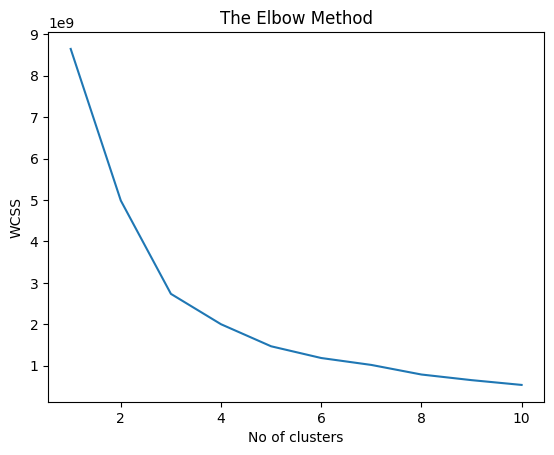

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

Acc to Elbow method,no of clusters should be 3

In [ ]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

Scatter plot for No of reactions vs comments

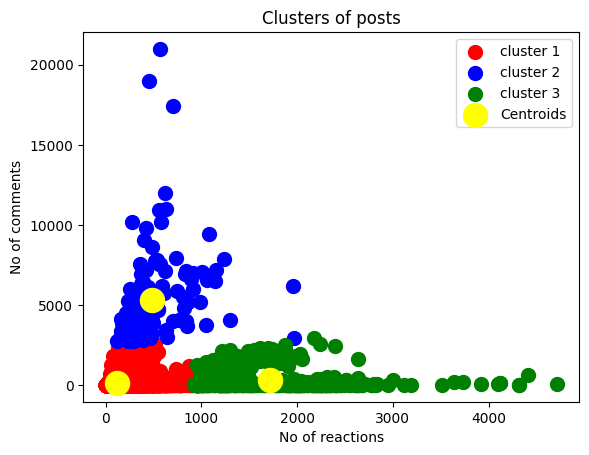

In [ ]:
plt.scatter(x[y_kmeans==0,4],x[y_kmeans==0,5],s=100,c='red',label='cluster 1')
plt.scatter(x[y_kmeans==1,4],x[y_kmeans==1,5],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans==2,4],x[y_kmeans==2,5],s=100,c='green',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,4],kmeans.cluster_centers_[:,5],s=300,c='yellow',label='Centroids')
plt.title('Clusters of posts')
plt.xlabel('No of reactions')
plt.ylabel('No of comments')
plt.legend()
plt.show()

Scatter plot for No of reactions vs likes

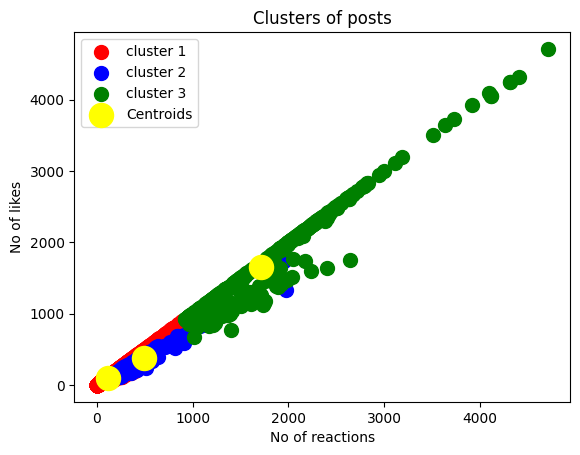

In [ ]:
plt.scatter(x[y_kmeans==0,4],x[y_kmeans==0,7],s=100,c='red',label='cluster 1')
plt.scatter(x[y_kmeans==1,4],x[y_kmeans==1,7],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans==2,4],x[y_kmeans==2,7],s=100,c='green',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,4],kmeans.cluster_centers_[:,7],s=300,c='yellow',label='Centroids')
plt.title('Clusters of posts')
plt.xlabel('No of reactions')
plt.ylabel('No of likes')
plt.legend()
plt.show()

# **Ques5**

In [ ]:
print(dataset.iloc[:,1].unique())

['video' 'photo' 'link' 'status']


4 types of posts in the dataset

# **Ques 6**

In [ ]:
avg = dataset.groupby(['status_type'])[['num_reactions', 'num_comments','num_shares']].mean()
print(avg)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
